In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_predict

In [2]:
df = pd.read_csv('./income_final.csv', encoding='utf8')

In [3]:
df

,Unnamed: 0,State_Name,State_ab,Lat,Lon,Mean,Median,Stdev,easting,northing,zone_number,zone_letter
0,18841,New York,NY,43.810218,-76.022978,54499,37697,48943,417722.480944,4.851303e+06,18,T
1,18843,New York,NY,41.848203,-73.555575,82188,56048,67388,619909.143604,4.633931e+06,18,T
2,18844,New York,NY,42.070565,-76.162636,73219,54363,55251,403819.017874,4.658265e+06,18,T
3,18845,New York,NY,40.588013,-73.729360,131519,114157,78333,607526.764688,4.493800e+06,18,T
4,18846,New York,NY,42.301697,-75.478883,52841,44096,42015,460527.894216,4.683385e+06,18,T
5,18847,New York,NY,40.606348,-73.645982,110516,91529,71566,614551.445436,4.495941e+06,18,T
6,18848,New York,NY,41.447173,-74.118707,100299,102874,56742,573615.263383,4.588774e+06,18,T
7,18850,New York,NY,41.068236,-73.954937,123435,115560,76643,587801.368729,4.546858e+06,18,T
8,18851,New York,NY,43.480862,-75.329636,48744,30120,49269,473342.375359,4.814269e+06,18,T
9,18852,New York,NY,43.149446,-75.985310,56966,300000,38069,419883.657551,4.777882e+06,18,T


In [4]:
data = df[['easting', 'northing', 'Mean']]

In [5]:
data

,easting,northing,Mean
0,417722.480944,4.851303e+06,54499
1,619909.143604,4.633931e+06,82188
2,403819.017874,4.658265e+06,73219
3,607526.764688,4.493800e+06,131519
4,460527.894216,4.683385e+06,52841
5,614551.445436,4.495941e+06,110516
6,573615.263383,4.588774e+06,100299
7,587801.368729,4.546858e+06,123435
8,473342.375359,4.814269e+06,48744
9,419883.657551,4.777882e+06,56966


In [6]:
X = df[['easting','northing']]

In [7]:
max(df.Mean)

209392

In [8]:
#set up bins
bin = [0,10000,50000,75000,100000,125000,150000,200000,300000]
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(data.Mean,bin,labels=["1", "2", "3", '4', '5', '6', '7', '8'])
category = category.to_frame()
category.columns = ['incomeBin']
#concatenate age and its bin
data_new = pd.concat([data,category],axis = 1)

In [9]:
data_new

,easting,northing,Mean,incomeBin
0,417722.480944,4.851303e+06,54499,3
1,619909.143604,4.633931e+06,82188,4
2,403819.017874,4.658265e+06,73219,3
3,607526.764688,4.493800e+06,131519,6
4,460527.894216,4.683385e+06,52841,3
5,614551.445436,4.495941e+06,110516,5
6,573615.263383,4.588774e+06,100299,5
7,587801.368729,4.546858e+06,123435,5
8,473342.375359,4.814269e+06,48744,2
9,419883.657551,4.777882e+06,56966,3


In [10]:
data_new['incomeBin'] = (data_new['incomeBin'].astype(str))

In [11]:
X_training, X_testing, Y_training, Y_testing = sklearn.model_selection.train_test_split(X, data_new.incomeBin, test_size = 0.33, random_state = 5)

In [12]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_training)

X_training = scaler.transform(X_training)  
X_testing = scaler.transform(X_testing)  

In [13]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_training, Y_training) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
y_pred = classifier.predict(X_testing) 

In [15]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_testing, y_pred))  
print(classification_report(Y_testing, y_pred)) 

[[ 56  39  11   4   1   0   0]
 [ 49 133  22   8   1   0   0]
 [ 18  57  44  18  11   1   0]
 [  7  18  32  43   6   2   0]
 [  2   4   7  13   9   3   1]
 [  0   1   3   8   3   0   2]
 [  7   4   2   0   2   0   1]]
             precision    recall  f1-score   support

          2       0.40      0.50      0.45       111
          3       0.52      0.62      0.57       213
          4       0.36      0.30      0.33       149
          5       0.46      0.40      0.43       108
          6       0.27      0.23      0.25        39
          7       0.00      0.00      0.00        17
        nan       0.25      0.06      0.10        16

avg / total       0.42      0.44      0.42       653



## Testing the error

In [16]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_training, Y_training)
    pred_i = knn.predict(X_testing)
    error.append(np.mean(pred_i != Y_testing))

Text(0,0.5,'Mean Error')

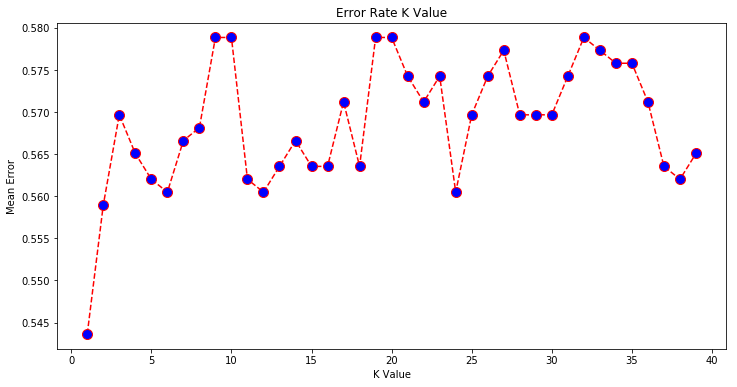

In [17]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 